In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
str_train_data = pd.read_csv('/Applications/Projects/Bladder Research/Data/Stratified Data/train_split.csv').value_counts(['tissue type']).reset_index(name='count')
str_valid_data = pd.read_csv('/Applications/Projects/Bladder Research/Data/Stratified Data/valid_split.csv').value_counts(['tissue type']).reset_index(name='count')
str_test_data = pd.read_csv('/Applications/Projects/Bladder Research/Data/Stratified Data/test_split.csv').value_counts(['tissue type']).reset_index(name='count')

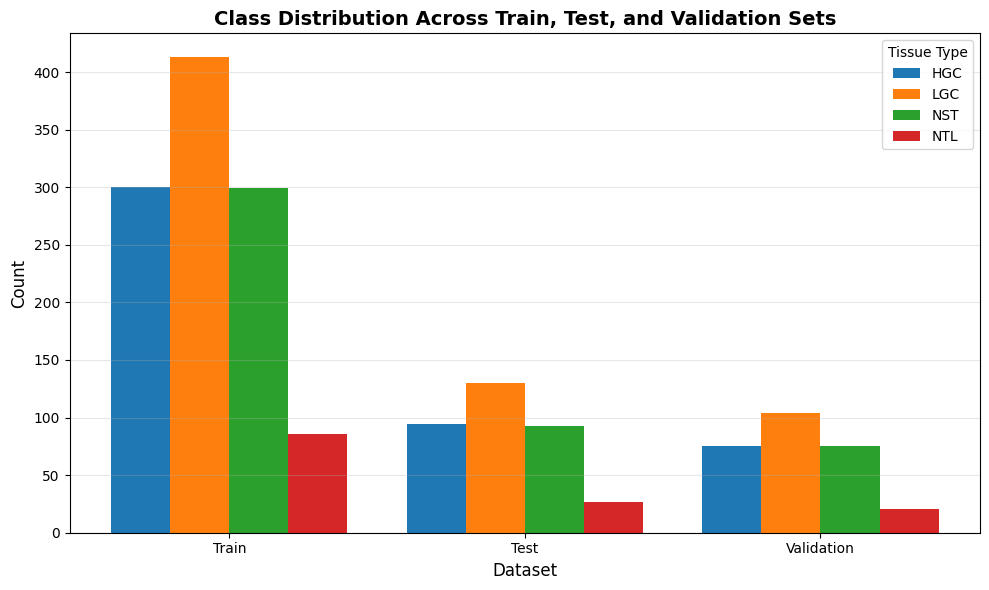

In [7]:
import numpy as np

# Get all unique tissue types
tissue_types = sorted(set(str_train_data['tissue type']) | set(str_test_data['tissue type']) | set(str_valid_data['tissue type']))

# Create dictionaries for easy lookup
train_dict = dict(zip(str_train_data['tissue type'], str_train_data['count']))
test_dict = dict(zip(str_test_data['tissue type'], str_test_data['count']))
valid_dict = dict(zip(str_valid_data['tissue type'], str_valid_data['count']))

# Prepare data with datasets on x-axis
datasets = ['Train', 'Test', 'Validation']
x = np.arange(len(datasets))
width = 0.2

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each tissue type
for i, tissue in enumerate(tissue_types):
    counts = [
        train_dict.get(tissue, 0),
        test_dict.get(tissue, 0),
        valid_dict.get(tissue, 0)
    ]
    ax.bar(x + i * width, counts, width, label=tissue)

# Customize the plot
ax.set_xlabel('Dataset', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Class Distribution Across Train, Test, and Validation Sets', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * (len(tissue_types) - 1) / 2)
ax.set_xticklabels(datasets)
ax.legend(title='Tissue Type')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('class_distribution_of_stratified_data.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
train = sum(str_train_data['count'])
valid = sum(str_valid_data['count'])
test = sum(str_test_data['count'])
combined = train + valid + test
print(f'Train: {train} ({round((train/combined)*100,2)}%)')
print(f'Validation: {valid} ({round((valid/combined)*100,2)}%)')
print(f'Test: {test} ({round((test/combined)*100,2)}%)')

Train: 1098 (63.95%)
Validation: 275 (16.02%)
Test: 344 (20.03%)
